<a href="https://colab.research.google.com/github/noreensharif/finalprojectkushublossom/blob/main/saspoloprojectlatest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D,Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Paths to dataset directories
train_dir = "/content/drive/My Drive/project_datasetnew/train_dir"
val_dir = "/content/drive/My Drive/project_datasetnew/val_dir"
test_dir = "/content/drive/My Drive/project_datasetnew/test_dir"

In [30]:
test_image_nonapple = "/content/drive/My Drive/project_datasetnew/test_dir/nonapple/4_100_0_5888.jpeg"
test_image_nonsaspolo = "/content/drive/My Drive/project_datasetnew/test_dir/nonsaspoloapple/4_100.jpg"
test_image_saspolo = "/content/drive/My Drive/project_datasetnew/test_dir/saspoloapple/d2_0_9704.jpeg"

In [5]:

# Parameters
image_size = (224, 224)  # Input size for MobileNetV2
batch_size = 32          # Batch size
epochs = 9           # Number of epochs (adjust based on requirements)

In [6]:
# Preprocessing data (no augmentation as dataset is large)
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
val_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

In [7]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)


Found 12651 images belonging to 3 classes.


In [8]:
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 1309 images belonging to 3 classes.


In [9]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 2264 images belonging to 3 classes.


In [10]:

# Load Pretrained MobileNetV2 model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [11]:

# Freeze the base model
base_model.trainable = False

In [12]:
# Add custom layers for classification


model = Sequential([
    base_model,  # Pretrained MobileNetV2 base
    GlobalAveragePooling2D(),
    Dropout(0.12),  # Add a dropout layer with 50% rate
    Dense(3, activation='softmax')  # 3 classes: saspolo, nonsaspolo, nonapple
])

In [13]:
from tensorflow.keras.applications import MobileNetV2

# Load MobileNetV2 without the top layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Display the architecture
base_model.summary()

# Check the output shape of the base model
from tensorflow.keras.models import Model

output_shape = base_model.output_shape
print(f"Output shape: {output_shape}")

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 2,223,872 (8.48 MB)

 Non-trainable params: 34,112 (133.25 KB)

Output shape: (None, 7, 7, 1280)


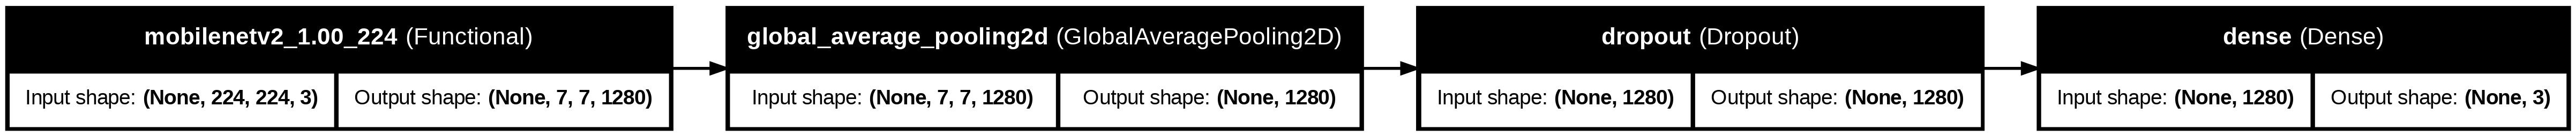

In [14]:
from tensorflow.keras.utils import plot_model

# Save and display the model architecture as a horizontal diagram
plot_model(
    model,
    to_file='model_architecture_horizontal.png',
    show_shapes=True,
    show_layer_names=True,
    rankdir='LR'  # 'LR' for left-to-right (horizontal), default is 'TB' (top-to-bottom)
)

In [15]:

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [16]:
early_stopping = EarlyStopping(
    monitor='val_loss',  # Metric to monitor
    patience=3,          # Number of epochs with no improvement after which training will stop
    restore_best_weights=True  # Restore the best model weights
)

In [17]:

# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs
)

Epoch 1/9


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


396/396 ━━━━━━━━━━━━━━━━━━━━ 2913s 7s/step - accuracy: 0.7928 - loss: 0.4953 - val_accuracy: 0.9083 - val_loss: 0.2311
Epoch 2/9
396/396 ━━━━━━━━━━━━━━━━━━━━ 625s 1s/step - accuracy: 0.9243 - loss: 0.2002 - val_accuracy: 0.9328 - val_loss: 0.1804
Epoch 3/9
396/396 ━━━━━━━━━━━━━━━━━━━━ 585s 1s/step - accuracy: 0.9371 - loss: 0.1743 - val_accuracy: 0.9427 - val_loss: 0.1488
Epoch 4/9
396/396 ━━━━━━━━━━━━━━━━━━━━ 612s 1s/step - accuracy: 0.9398 - loss: 0.1600 - val_accuracy: 0.9465 - val_loss: 0.1441
Epoch 5/9
396/396 ━━━━━━━━━━━━━━━━━━━━ 583s 1s/step - accuracy: 0.9476 - loss: 0.1419 - val_accuracy: 0.9503 - val_loss: 0.1347
Epoch 6/9
396/396 ━━━━━━━━━━━━━━━━━━━━ 589s 1s/step - accuracy: 0.9504 - loss: 0.1325 - val_accuracy: 0.9519 - val_loss: 0.1361
Epoch 7/9
396/396 ━━━━━━━━━━━━━━━━━━━━ 573s 1s/step - accuracy: 0.9469 - loss: 0.1405 - val_accuracy: 0.9412 - val_loss: 0.1548
Epoch 8/9
396/396 ━━━━━━━━━━━━━━━━━━━━ 611s 1s/step - accuracy: 0.9513 - loss: 0.1236 - val_accuracy: 0.9503 - va

In [18]:

# Evaluate on test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


71/71 ━━━━━━━━━━━━━━━━━━━━ 587s 8s/step - accuracy: 0.9315 - loss: 0.1836
Test Accuracy: 92.67%


In [19]:

# Save the trained model
model.save('/content/drive/My Drive/kushublossom_model_final.h5')

In [20]:

# Class labels mapping
class_indices = train_generator.class_indices
print(f"Class indices: {class_indices}")
class_names = {v: k for k, v in class_indices.items()}  # Reverse mapping


Class indices: {'nonapple': 0, 'nonsaspoloapple': 1, 'saspoloapple': 2}


In [21]:
# Plot training and validation accuracy/loss
plt.figure(figsize=(12, 6))


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

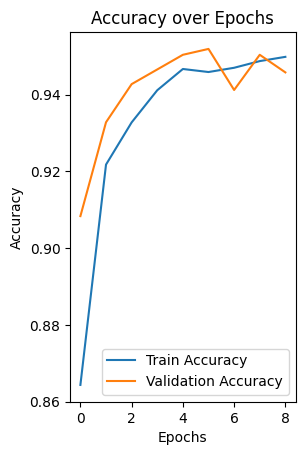

In [22]:

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

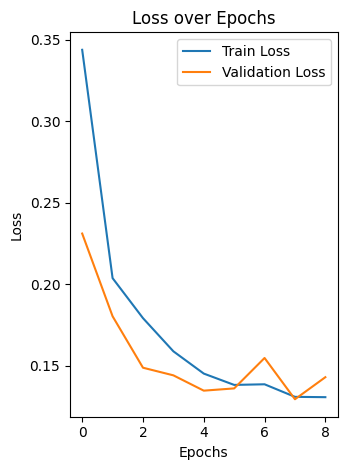

In [23]:
# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [24]:

# Function to predict a single image
def predict_image(image_path):
    # Load and preprocess the image
    img = load_img(image_path, target_size=image_size)
    img_array = img_to_array(img)
    img_array = preprocess_input(img_array)
    img_array = np.expand_dims(img_array, axis=0)

    # Predict the class
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)[0]
    confidence = predictions[0][predicted_class] * 100
    class_name = class_names[predicted_class]


    # Show image and prediction
    plt.imshow(img)
    plt.title(f"Predicted: {class_name} ({confidence:.2f}%)")
    plt.axis('off')
    plt.show()

    return class_name, confidence

Testing Non-Apple Image:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


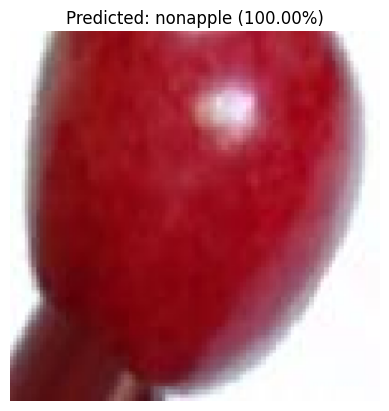

Testing Non-Saspolo Image:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


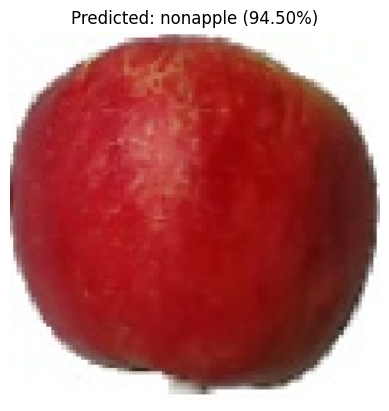

Testing Saspolo Image:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


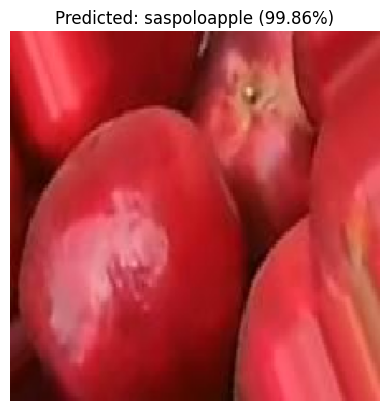

('saspoloapple', 99.85986351966858)

In [31]:
# Test the model with three specific images
print("Testing Non-Apple Image:")
predict_image(test_image_nonapple)

print("Testing Non-Saspolo Image:")
predict_image(test_image_nonsaspolo)

print("Testing Saspolo Image:")
predict_image(test_image_saspolo)

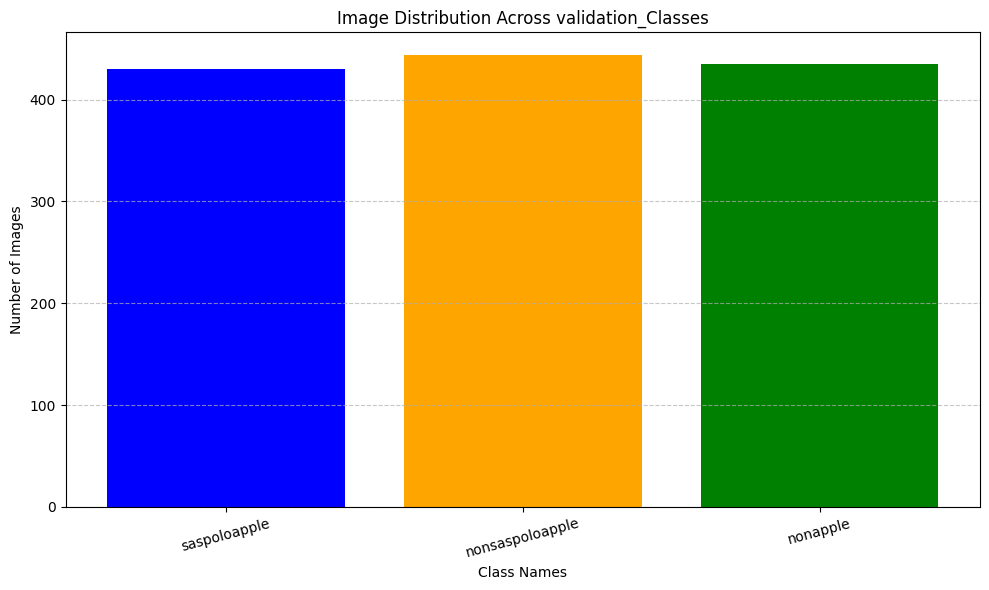

In [32]:
import os
import matplotlib.pyplot as plt

# Define the dataset path
dataset_path = '/content/drive/My Drive/project_datasetnew/val_dir'

# Get the list of classes (folders) in the dataset directory
classes = os.listdir(dataset_path)

# Count the number of images in each class
class_counts = {class_name: len(os.listdir(os.path.join(dataset_path, class_name))) for class_name in classes}

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values(), color=['blue', 'orange', 'green'])
plt.title('Image Distribution Across validation_Classes')
plt.xlabel('Class Names')
plt.ylabel('Number of Images')
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


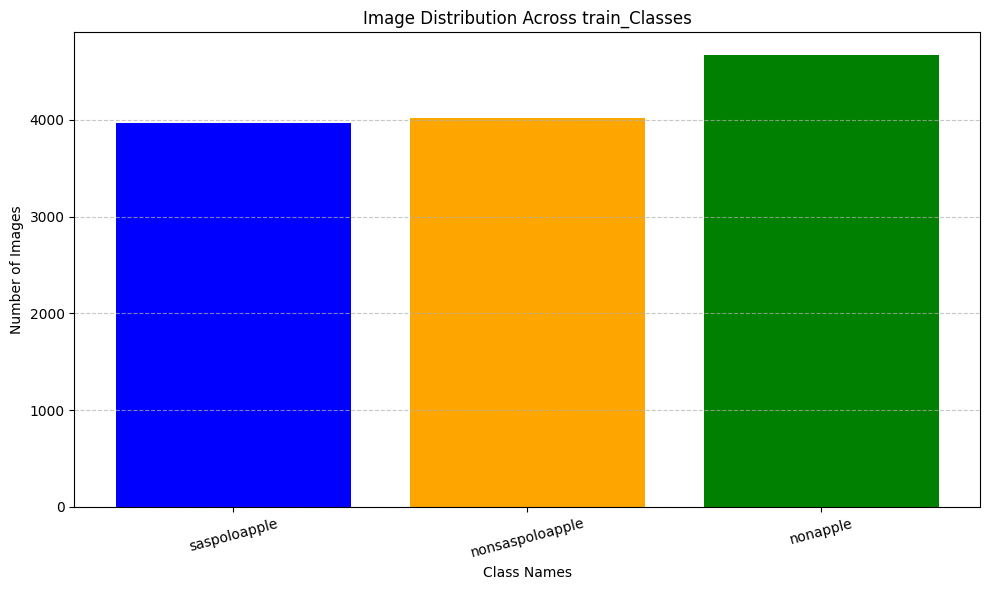

In [33]:
import os
import matplotlib.pyplot as plt

# Define the dataset path
dataset_path = '/content/drive/My Drive/project_datasetnew/train_dir'

# Get the list of classes (folders) in the dataset directory
classes = os.listdir(dataset_path)

# Count the number of images in each class
class_counts = {class_name: len(os.listdir(os.path.join(dataset_path, class_name))) for class_name in classes}

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values(), color=['blue', 'orange', 'green'])
plt.title('Image Distribution Across train_Classes')
plt.xlabel('Class Names')
plt.ylabel('Number of Images')
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

71/71 ━━━━━━━━━━━━━━━━━━━━ 104s 1s/step


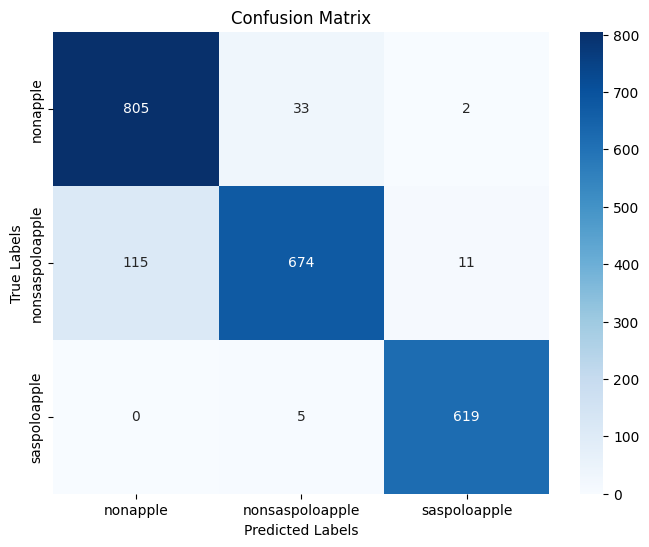

                 precision    recall  f1-score   support

       nonapple       0.88      0.96      0.91       840
nonsaspoloapple       0.95      0.84      0.89       800
   saspoloapple       0.98      0.99      0.99       624

       accuracy                           0.93      2264
      macro avg       0.93      0.93      0.93      2264
   weighted avg       0.93      0.93      0.93      2264



In [34]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Generate predictions on the test set
y_pred_probs = model.predict(test_generator)  # Get predicted probabilities
y_pred = np.argmax(y_pred_probs, axis=1)      # Convert probabilities to class labels

# Get true labels from the test generator
y_true = test_generator.classes                # True labels from the generator

# Class names (reverse mapping of class indices)
class_names = list(test_generator.class_indices.keys())

# Create a confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Print a classification report for detailed metrics
print(classification_report(y_true, y_pred, target_names=class_names))
